# LUCAS KANNADE ALGORITHM

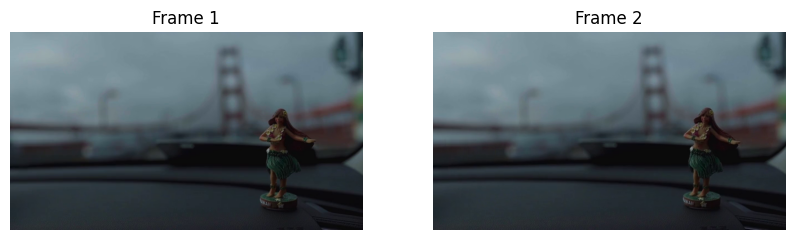

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the video
video_path = r"C:\Users\madhu\Downloads\video4.mp4"
cap = cv2.VideoCapture(video_path)

# Read the first two frames
ret1, frame1 = cap.read()
ret2, frame2 = cap.read()


cap.release()

# Convert frames from BGR to RGB (for Matplotlib)
if ret1 and ret2:
    
    frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
    frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

    # Plot the two frames
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(frame1)
    plt.title("Frame 1")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(frame2)
    plt.title("Frame 2")
    plt.axis("off")

    plt.show()
else:
    print("Error: Could not read frames from video.")


# FRAME DIFFERENCES

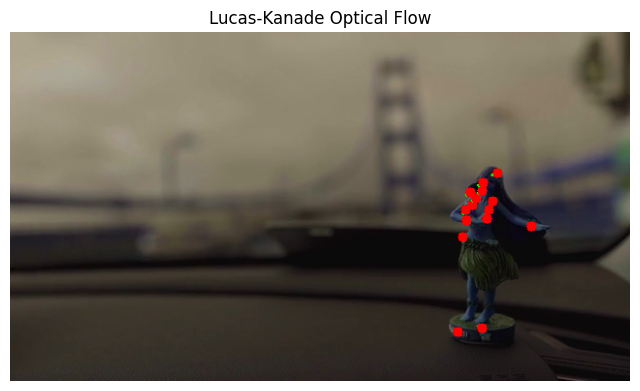

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Ensure frames are loaded correctly
if frame1 is None or frame2 is None:
    print("Error: Could not load frames.")
    exit()

# Resize both frames to the same size (if needed)
frame2 = cv2.resize(frame2, (frame1.shape[1], frame1.shape[0]))

# Convert images to grayscale
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Parameters for Shi-Tomasi corner detection
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Detect good features to track in the first frame
p0 = cv2.goodFeaturesToTrack(gray1, mask=None, **feature_params)

# Ensure at least one feature is detected
if p0 is None:
    print("No good features found in frame1.")
    exit()

# Parameters for Lucas-Kanade Optical Flow
lk_params = dict(winSize=(15, 15), maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Compute optical flow from frame1 to frame2
p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, p0, None, **lk_params)

# Select good points
if p1 is not None and st is not None:
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # Draw the motion vectors
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        frame2 = cv2.line(frame2, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
        frame2 = cv2.circle(frame2, (int(a), int(b)), 5, (0, 0, 255), -1)

    # Convert BGR to RGB for Matplotlib
    frame2_rgb = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

    # Plot the final output using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(frame2_rgb)
    plt.title("Lucas-Kanade Optical Flow")
    plt.axis("off")  # Hide axes
    plt.show()
else:
    print("Optical flow could not be calculated.")


# APPLY LUCAS

In [3]:
import cv2
import numpy as np

# Load the video
video_path = r"C:\Users\madhu\Downloads\video4.mp4"
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Read the first frame
ret, old_frame = cap.read()
if not ret:
    print("Error: Could not read first frame.")
    exit()

# Convert first frame to grayscale
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

# Parameters for Shi-Tomasi corner detection (finding good features to track)
feature_params = dict(maxCorners=200, qualityLevel=0.3, minDistance=7, blockSize=7)

# Detect features in the first frame
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# Parameters for Lucas-Kanade Optical Flow
lk_params = dict(winSize=(15, 15), maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create a mask for drawing optical flow lines
mask = np.zeros_like(old_frame)

while cap.isOpened():
    # Read the next frame
    ret, new_frame = cap.read()
    if not ret:
        break  # Exit loop when video ends

    # Convert new frame to grayscale
    new_gray = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)

    # Calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, new_gray, p0, None, **lk_params)

    # Select good points
    if p1 is not None and st is not None:
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        # Draw the motion vectors
        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
            new_frame = cv2.circle(new_frame, (int(a), int(b)), 5, (0, 0, 255), -1)

        # Overlay the motion vectors on the frame
        output = cv2.add(new_frame, mask)

        # Show the result
        cv2.imshow('Optical Flow - Lucas Kanade', output)

        # Update previous frame and points
        old_gray = new_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(50) & 0xFF == ord('q'):
            break
    else:
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()
